In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
# Load the Excel file in chunks to handle large data efficiently
file_path = 'PS_20174392719_1491204439457_log.csv'
# sheet_name = 'Sheet1'  # Specify the sheet name if needed

# Read only the first 600,000 rows
chunk_size = 1200000  # Define the number of rows to extract

# Load the first 600,000 rows
df = pd.read_csv(file_path, nrows=chunk_size)

# Save the extracted rows into a new Excel file
df.to_csv('extracted_600k_rows.csv', index=False)


In [ ]:
fraud_data = pd.read_csv("extracted_600k_rows.csv")
columns_to_fill = ['newbalanceDest', 'isFraud', 'isFlaggedFraud']
fraud_data[columns_to_fill] = fraud_data[columns_to_fill].fillna(0)

In [ ]:
fraud_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
fraud_data.size

13200000

In [ ]:
fraud_data.tail(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1199995,133,CASH_OUT,522078.43,C35178008,0.0,0.0,C1809291601,2850418.73,3372497.16,0,0
1199996,133,CASH_OUT,109652.65,C1286478837,0.0,0.0,C556319746,922051.47,1031704.12,0,0
1199997,133,CASH_OUT,152444.06,C1917822636,0.0,0.0,C1669945872,339399.29,491843.35,0,0
1199998,133,CASH_OUT,166667.54,C64060142,0.0,0.0,C2091862628,2048538.06,2215205.60,0,0
1199999,133,CASH_OUT,205350.31,C1195197578,0.0,0.0,C1619415326,2035736.29,2241086.61,0,0


In [ ]:
print("Data doesn't contain any NULL values")
fraud_data.isnull().any()

Data doesn't contain any NULL values


,0
step,False
type,False
amount,False
nameOrig,False
oldbalanceOrg,False
newbalanceOrig,False
nameDest,False
oldbalanceDest,False
newbalanceDest,False
isFraud,False


In [ ]:
fraud_data.shape

(1200000, 11)

In [ ]:
average_transaction_amount = fraud_data['amount'].mean()
max_transaction_amount = fraud_data['amount'].max()
min_transaction_amount = fraud_data['amount'].min()

print(f"Average Transaction Amount: {average_transaction_amount}")
print(f"Maximum Transaction Amount: {max_transaction_amount}")
print(f"Minimum Transaction Amount: {min_transaction_amount}")

Average Transaction Amount: 161919.62864322498
Maximum Transaction Amount: 10000000.0
Minimum Transaction Amount: 0.1


In [ ]:
print('Dropping unwanted columns which we see has no impact on the result')
fraud_data.drop(labels=['nameOrig','nameDest'],axis=1,inplace=True)

Dropping unwanted columns which we see has no impact on the result


In [ ]:
fraud_data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


## **Data** **Analysis**

Since there is no missing and garbage value, there is no need for data cleaning, but we still need to perform **data analysis** as data contain huge variation of the value in different columns.

Text(0, 0.5, 'Amount')

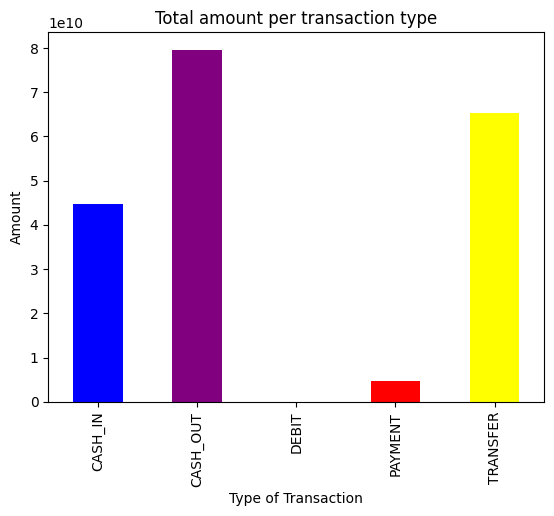

In [ ]:
var = fraud_data.groupby('type').amount.sum()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
var.plot(kind='bar', color=['blue','purple','orange','red','yellow'])
ax1.set_title("Total amount per transaction type")
ax1.set_xlabel('Type of Transaction')
ax1.set_ylabel('Amount')

In [ ]:
fraud_data.loc[fraud_data.isFraud == 1].type.unique()

array(['TRANSFER', 'CASH_OUT'], dtype=object)

**TRANSFER** and **CASH_OUT** are two most used mode of transaction and the only way in which fraud happen are **TRANSFER** and **CASH_OUT**.

In [ ]:
fraud = fraud_data.loc[fraud_data.isFraud == 1].count()
nonfraud = fraud_data.loc[fraud_data.isFraud == 0].count()

In [ ]:
print('The total number of fraud transaction is {}.'.format(fraud_data.isFraud.sum()))
print('The total number of fraud transaction which is marked as fraud {}.'.format(fraud_data.isFlaggedFraud.sum()))

# Extract the total count of fraud and non-fraud transactions
total_fraud = fraud.sum()
total_nonfraud = nonfraud.sum()

# Calculate the ratio and print the result
ratio = int(total_nonfraud // total_fraud)
print('Ratio of fraud transaction vs non-fraud transaction is 1:{}.'.format(ratio))

The total number of fraud transaction is 1518.
The total number of fraud transaction which is marked as fraud 0.
Ratio of fraud transaction vs non-fraud transaction is 1:789.


Total no. of **Fraud Transaction**,
total no. of **Fraud Transaction** which is **marked as fraud**
and the **ratio** of **Fraud** vs **Non-Fraud** transaction.

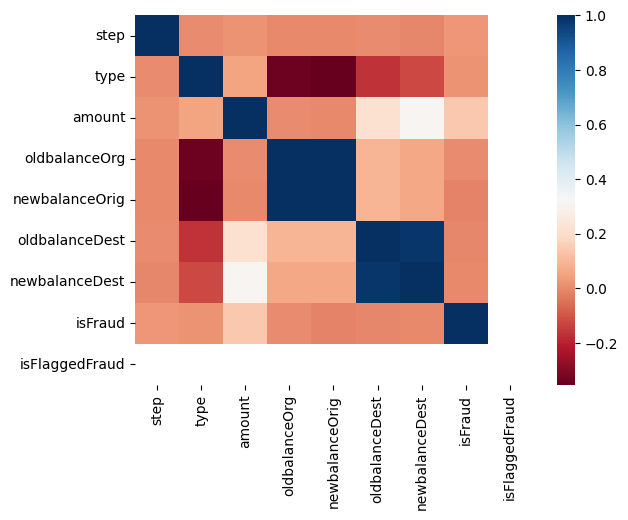

In [ ]:
# Convert the 'type' column to a categorical data type
fraud_data['type'] = fraud_data['type'].astype('category')

# Use .cat.codes to get numerical representation of categories
fraud_data['type'] = fraud_data['type'].cat.codes

# Now compute and visualize the correlation matrix
sns.heatmap(fraud_data.corr(), cmap='RdBu')
plt.show()

**Things we can conclude from this heatmap:**

*   OldbalanceOrg and NewbalanceOrg are highly correlated.
*   OldbalanceDest and NewbalanceDest are highly correlated.
*   Amount is correlated with isFraud(Target Variable).

There is not much relation between the features, so we need to understand where the relationship between them depends on the type of transaction and amount. To do so, we need to see the heat map of fraud and nonfraud transactions differently.

In [ ]:
fraud = fraud_data.loc[fraud_data.isFraud == 1]
nonfraud = fraud_data.loc[fraud_data.isFraud == 0]

In [ ]:
fraudcount = fraud.isFraud.count()
nonfraudcount = nonfraud.isFraud.count()

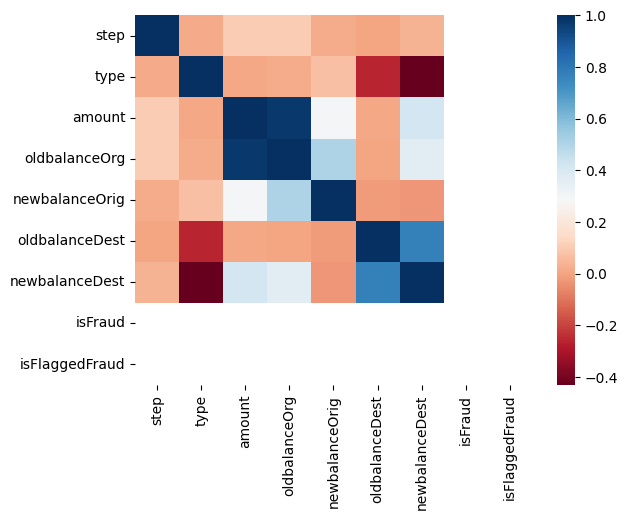

In [ ]:
sns.heatmap(fraud.corr(),cmap='RdBu',);

There are 2 flags which stand out to me and it's interesting to look onto: **isFraud** and **isFlaggedFraud** column. From the hypothesis, isFraud is the indicator which indicates the **actual fraud transactions** whereas isFlaggedFraud is what the system prevents the transaction due to **some thresholds** being triggered. From the above heatmap we can see that there is some relation between other columns and isFlaggedFraud thus there must be relation between isFraud.

## **Data Exploration**

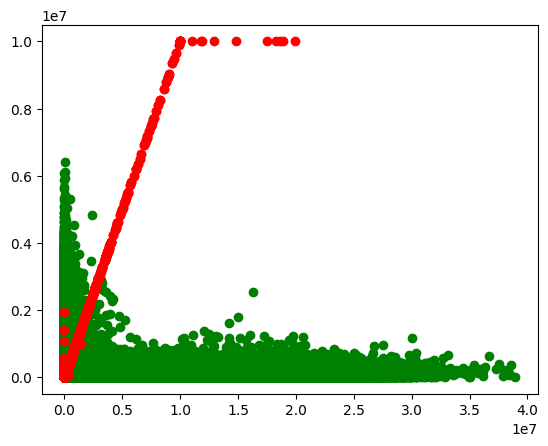

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(nonfraud['oldbalanceOrg'],nonfraud['amount'],c='g')
ax.scatter(fraud['oldbalanceOrg'],fraud['amount'],c='r')
plt.show()

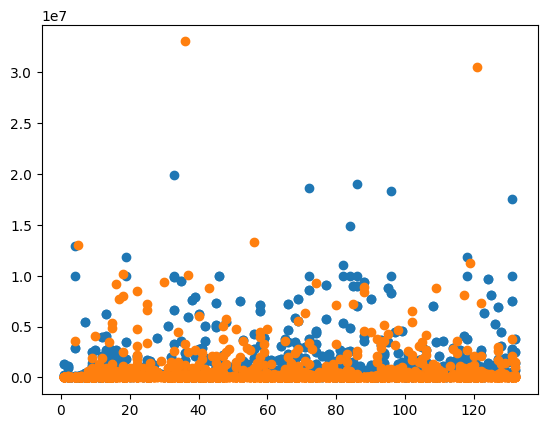

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(fraud['step'],fraud['oldbalanceOrg'])
ax.scatter(fraud['step'],fraud['oldbalanceDest'])
plt.show()

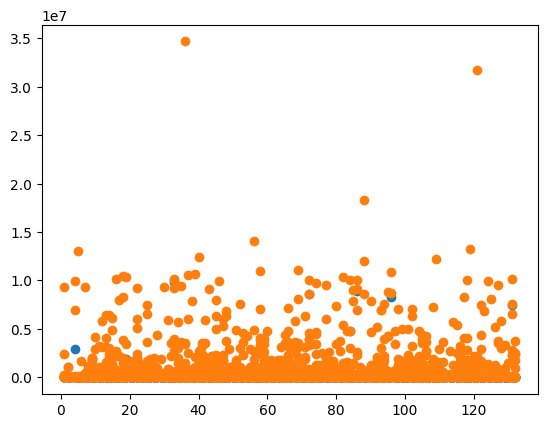

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(fraud['step'],fraud['newbalanceOrig'])
ax.scatter(fraud['step'],fraud['newbalanceDest'])
plt.show()

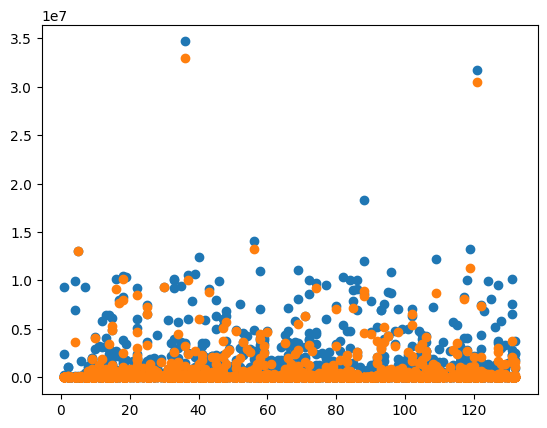

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(fraud['step'],fraud['newbalanceDest'])
ax.scatter(fraud['step'],fraud['oldbalanceDest'])
plt.show()

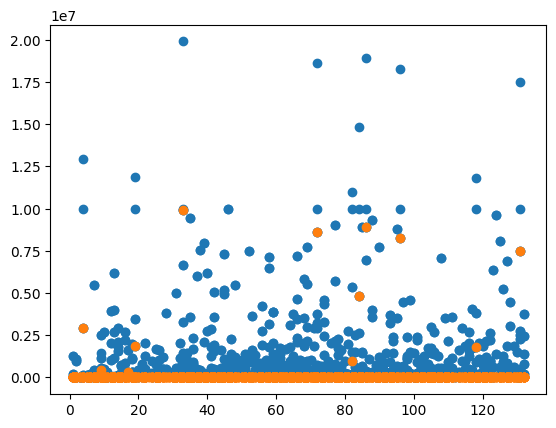

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(fraud['step'],fraud['oldbalanceOrg'])
ax.scatter(fraud['step'],fraud['newbalanceOrig'])
plt.show()

##**Data Cleaning**

In [ ]:
import pickle

In [ ]:
data_fraud = pd.read_csv('extracted_600k_rows.csv')

In [ ]:
data_fraud = data_fraud.replace(to_replace={'PAYMENT':1,'TRANSFER':2,'CASH_OUT':3,'CASH_IN':4,'DEBIT':5,'No':0,'Yes':1})

<ipython-input-27-28c9b4d8ba1d>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_fraud = data_fraud.replace(to_replace={'PAYMENT':1,'TRANSFER':2,'CASH_OUT':3,'CASH_IN':4,'DEBIT':5,'No':0,'Yes':1})


In [ ]:
data_fraud.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1,inplace=True)

In [ ]:
data_fraud.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,1,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,1,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,2,181.00,181.0,0.00,0.0,0.0,1
3,1,3,181.00,181.0,0.00,21182.0,0.0,1
4,1,1,11668.14,41554.0,29885.86,0.0,0.0,0


##**Machine Learning**


In [ ]:
X = data_fraud.drop(['isFraud'],axis=1)
y = data_fraud[['isFraud']]
print(X)
print(y)

         step  type     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0           1     1    9839.64       170136.0       160296.36            0.00   
1           1     1    1864.28        21249.0        19384.72            0.00   
2           1     2     181.00          181.0            0.00            0.00   
3           1     3     181.00          181.0            0.00        21182.00   
4           1     1   11668.14        41554.0        29885.86            0.00   
...       ...   ...        ...            ...             ...             ...   
1199995   133     3  522078.43            0.0            0.00      2850418.73   
1199996   133     3  109652.65            0.0            0.00       922051.47   
1199997   133     3  152444.06            0.0            0.00       339399.29   
1199998   133     3  166667.54            0.0            0.00      2048538.06   
1199999   133     3  205350.31            0.0            0.00      2035736.29   

         newbalanceDest  
0

In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 121)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=15)

In [ ]:
if True:
    probabilities = clf.fit(train_X, train_y.values.ravel()).predict(test_X)

In [ ]:
from sklearn.metrics import average_precision_score, accuracy_score, f1_score
if True:
    print("F1 score is: ", f1_score(test_y,probabilities))
    print("Accuracy score is: ", accuracy_score(test_y,probabilities))
    print("Average precision score is: ", average_precision_score(test_y,probabilities))

F1 score is:  0.8914285714285715
Accuracy score is:  0.9997625
Average precision score is:  0.8012817104095347


In [ ]:
new_data = pd.DataFrame({
    'step': [1, 10, 50],
    'type': [0, 1, 2],  # Assuming 0, 1, 2 correspond to 'type' categories (you might need to encode based on your dataset)
    'amount': [2000, 500464651200, 12000],
    'oldbalanceOrg': [10000, 2000544635600, 5000],
    'newbalanceOrig': [8000, 150000, 3000],
    'oldbalanceDest': [5000, 0, 7000],
    'newbalanceDest': [7000, 50000, 10000]
})

# Make predictions on the new dataset
new_predictions = clf.predict(new_data)

# Display the results for the new dataset
print("New Test Data Predictions (1 = Fraud, 0 = Not Fraud):")
for i, pred in enumerate(new_predictions):
    print(f"Transaction {i + 1}: {'Fraudulent' if pred == 1 else 'Not Fraudulent'}")

New Test Data Predictions (1 = Fraud, 0 = Not Fraud):
Transaction 1: Not Fraudulent
Transaction 2: Fraudulent
Transaction 3: Not Fraudulent


In [ ]:
import pickle
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(train_X, train_y)  # Train your model using your training dataset

# Save the model using pickle
with open('fraud_detection_model.pkl', 'wb') as file:
    pickle.dump(clf, file)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


# **New/Imporved Model**

In [ ]:
# fraud_detection_model_training.py

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import joblib

In [ ]:
# 1. Load your dataset
df = pd.read_csv("extracted_600k_rows.csv")  # Replace with your actual dataset

In [ ]:
# 2. Label encode 'type' feature
df['type'] = LabelEncoder().fit_transform(df['type'])

In [ ]:
# 3. Feature Engineering
df['diff_orig'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['diff_dest'] = df['newbalanceDest'] - df['oldbalanceDest']
df['is_orig_empty'] = ((df['oldbalanceOrg'] == 0) & (df['newbalanceOrig'] == 0)).astype(int)
df['is_dest_empty'] = ((df['oldbalanceDest'] == 0) & (df['newbalanceDest'] == 0)).astype(int)

In [ ]:
# 4. Features and label
X = df[['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
        'oldbalanceDest', 'newbalanceDest', 'diff_orig', 'diff_dest',
        'is_orig_empty', 'is_dest_empty']]
y = df['isFraud']

In [ ]:
# 5. Split and balance the data

# Drop rows where the target 'isFraud' is NaN
Xy = pd.concat([X, y], axis=1)
Xy = Xy.dropna(subset=['isFraud'])

# Separate features and target again
X = Xy.drop('isFraud', axis=1)
y = Xy['isFraud']

# Now safely split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Apply SMOTE to balance the training set
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

In [ ]:
# 6. Train model
clf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
clf.fit(X_resampled, y_resampled)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
# 7. Evaluate
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))

[[11233     9]
 [    7    13]]
              precision    recall  f1-score   support

         0.0     0.9994    0.9992    0.9993     11242
         1.0     0.5909    0.6500    0.6190        20

    accuracy                         0.9986     11262
   macro avg     0.7951    0.8246    0.8092     11262
weighted avg     0.9987    0.9986    0.9986     11262



In [ ]:
# 8. Save model
joblib.dump(clf, "improved_fraud_detection_model.pkl")

['improved_fraud_detection_model.pkl']